In [1]:
!pip install causal-ccm
from causal_ccm.causal_ccm import ccm

/Users/prince.javier/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

## Generate Sample Dataset

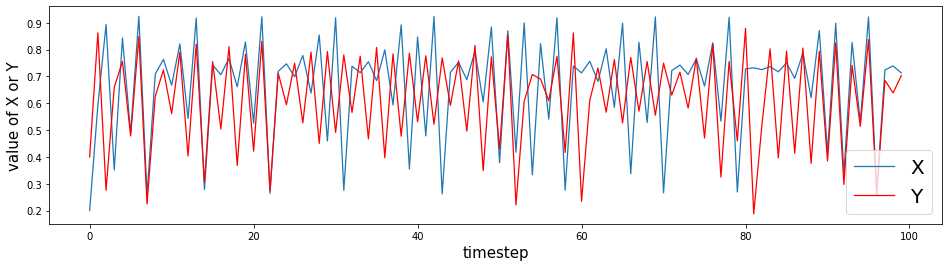

In [3]:
# Initialize test dataset

def func_1(A, B, r, beta):
    return A * (r - r * A - beta * B)

# params
r_x = 3.7
r_y = 3.7
B_xy = 0 # effect on x given y (effect of y on x)
B_yx = 0.32 # effect on y given x (effect of x on y)

X0 = 0.2 # initial val following Sugihara et al
Y0 = 0.4 # initial val following Sugihara et al
t = 3000 # time steps

X = [X0]
Y = [Y0]
for i in range(t):
    X_ = func_1(X[-1], Y[-1], r_x, B_xy)
    Y_ = func_1(Y[-1], X[-1], r_y, B_yx)    
    X.append(X_)
    Y.append(Y_)   
    
plt.figure(figsize=(16,4))
max_t = 100
plt.plot(X[:max_t], linewidth=1.25, label='X')
plt.plot(Y[:max_t], c='r', linewidth=1.25, label='Y')
plt.xlabel('timestep', size=15)
plt.ylabel('value of X or Y', size=15)
plt.legend(prop={'size': 20})    

## Run CCM

In [4]:
tau = 1 # time lag
E = 2 # shadow manifold embedding dimensions
L = len(X) # length of time period to consider

ccm1 = ccm(X, Y, tau, E, L)

In [5]:
# causality X -> Y
# returns: (correlation ("strength" of causality), p-value(significance))
ccm1.causality()

(0.9922458514060817, 0.0)

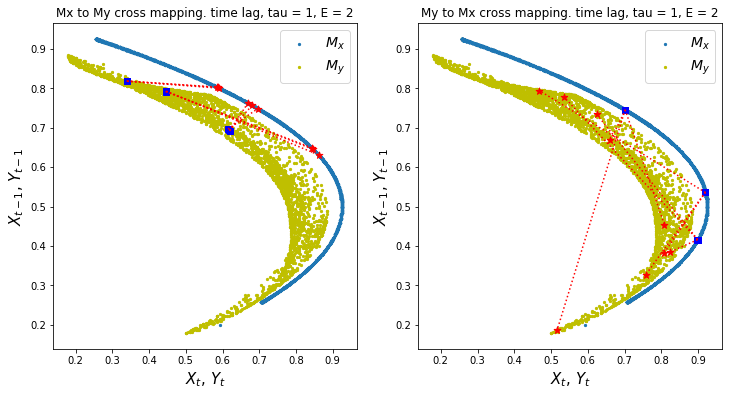

In [6]:
# visualize sample cross mapping
ccm1.visualize_cross_mapping()

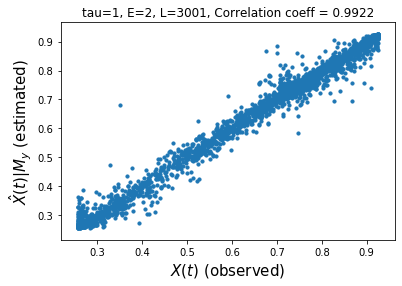

In [7]:
# visualize correlation of X->Y
# stronger correlation = stronger causal relationship
ccm1.plot_ccm_correls()

100%|██████████| 15/15 [00:10<00:00,  1.37it/s]


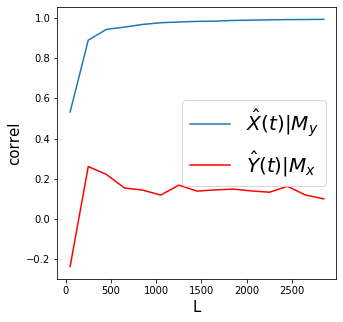

In [8]:
# checking convergence
# Looking at "convergence"
L_range = range(50, 3000, 200) # L values to test
tau = 1
E = 2

Xhat_My, Yhat_Mx = [], [] # correlation list
for L in tqdm(L_range): 
    ccm_XY = ccm(X, Y, tau, E, L) # define new ccm object # Testing for X -> Y
    ccm_YX = ccm(Y, X, tau, E, L) # define new ccm object # Testing for Y -> X    
    Xhat_My.append(ccm_XY.causality()[0]) 
    Yhat_Mx.append(ccm_YX.causality()[0]) 
    
# plot convergence as L->inf. Convergence is necessary to conclude causality
plt.figure(figsize=(5,5))
plt.plot(L_range, Xhat_My, label='$\hat{X}(t)|M_y$')
plt.plot(L_range, Yhat_Mx, c='r', label='$\hat{Y}(t)|M_x$')
plt.xlabel('L', size=15)
plt.ylabel('correl', size=15)
plt.legend(prop={'size': 20})    
    

From the charts above, we find clear convergent cross mapping for the effect of $X$ on $Y$ but no clear CCM for the effect of $Y$ on $X$. We can then say that $X$ drives $Y$ but $Y$ does not drive $X$